<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund/blob/master/random_forest_regression_2_eurusd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
#using eurusd, change to your preferred asset
eu = pd.read_csv('EURUSD1440.csv')
eu.tail(2)

,1971.01.04,00:00,0.53690,0.53690.1,0.53690.2,0.53690.3,1
12767,2021.11.12,00:00,1.14468,1.1462,1.14327,1.14428,70130
12768,2021.11.15,00:00,1.14470,1.1447,1.14425,1.14431,231


In [3]:
eu.columns=['Date','Time','eu_Open','eu_High','eu_Low','eu_Close','Volume']
#Use D1 at least 2000 observations, change below for the number of rows you have.
#session crash or slow computing time may require you to use less rows. 
#eu = eu.iloc[-2000:] 
eu = eu.iloc[-8000:] 
eu = eu.reset_index(drop=True)
eu['Index']=eu.index
eu.set_index('Index', drop=True, append=False, inplace=True, verify_integrity=False)
#and make index a feature
eu.reset_index(inplace=True)
#drop last rows if needed
#eu = eu[:-1]
print(eu.head())
print(eu.tail())

   Index        Date   Time  eu_Open  eu_High  eu_Low  eu_Close  Volume
0      0  1990.09.04  00:00   1.2351   1.2429  1.2327    1.2381    1741
1      1  1990.09.05  00:00   1.2375   1.2559  1.2368    1.2554    2031
2      2  1990.09.06  00:00   1.2549   1.2595  1.2523    1.2584    1091
3      3  1990.09.07  00:00   1.2583   1.2590  1.2466    1.2472    1371
4      4  1990.09.10  00:00   1.2501   1.2523  1.2341    1.2369    2321
      Index        Date   Time  eu_Open  eu_High   eu_Low  eu_Close  Volume
7995   7995  2021.11.09  00:00  1.15830  1.16086  1.15696   1.15941   84689
7996   7996  2021.11.10  00:00  1.15915  1.15952  1.14759   1.14764  109854
7997   7997  2021.11.11  00:00  1.14769  1.14874  1.14429   1.14488   67531
7998   7998  2021.11.12  00:00  1.14468  1.14620  1.14327   1.14428   70130
7999   7999  2021.11.15  00:00  1.14470  1.14470  1.14425   1.14431     231


In [4]:
#for close prediction
#select rows to use for x,y
x = eu.iloc[:,[0]].values
print(x)
y = eu.iloc[:,[6]].values
print(y)

[[   0]
 [   1]
 [   2]
 ...
 [7997]
 [7998]
 [7999]]
[[1.2381 ]
 [1.2554 ]
 [1.2584 ]
 ...
 [1.14488]
 [1.14428]
 [1.14431]]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [ ]:
#for close prediction and accuracy test
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
# create regressor object
regressor = RandomForestRegressor(n_estimators = 10000, n_jobs=-1)
#regressor = RandomForestRegressor(n_jobs=-1)
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [36]:
y_pred = regressor.predict(X_test)

In [37]:
def mean_absolute_percentage_error(y_true,y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,y_pred)

In [38]:
#for regression score
from sklearn import metrics 
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', mape)


MAE: 0.005038535724272741
MSE: 4.816036736888794e-05
RMSE: 0.00693976709759686
MAPE: 13.860070262083548


In [ ]:
#for close prediction
y_pred_c = regressor.predict(np.array(7999).reshape(1, 1)) # test the output by changing values
y_pred_c

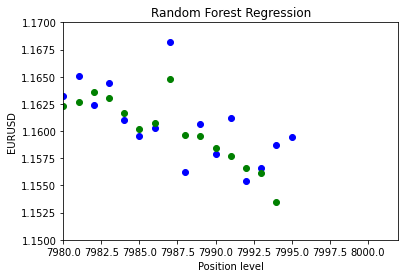

In [10]:
#for close prediction
# Visualising the Random Forest Regression results

# arange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01
# between two consecutive values
X_grid = np.arange(min(x), max(x), 1)

# reshape for reshaping the data into a len(X_grid)*1 array,
# i.e. to make a column out of the X_grid value				
X_grid = X_grid.reshape((len(X_grid), 1))

# Scatter plot for original data
plt.scatter(x, y, color = 'blue')

# plot predicted data
plt.scatter(X_grid, regressor.predict(X_grid),
		color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('EURUSD')
plt.xlim(7980,8002)
plt.ylim(1.15,1.17)
plt.show()


In [11]:
#for low prediction
#select rows to use for x,y
x = eu.iloc[:,[0]].values
print(x)
y = eu.iloc[:,[5]].values
print(y)

[[   0]
 [   1]
 [   2]
 ...
 [7996]
 [7997]
 [7998]]
[[1.2327 ]
 [1.2368 ]
 [1.2523 ]
 ...
 [1.14759]
 [1.14429]
 [1.14327]]


In [12]:
#for low prediction
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [13]:
#for low prediction and accuracy test
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
# create regressor object
regressor = RandomForestRegressor(n_estimators = 2000, n_jobs=-1, criterion='mae')
#regressor = RandomForestRegressor(n_jobs=-1)
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [14]:
#for low pred 
y_pred = regressor.predict(X_test)
mape = mean_absolute_percentage_error(y_test,y_pred)

In [15]:
#for low pred regression score
from sklearn import metrics 
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', mape)

MAE: 0.004226923533333671
MSE: 3.508685091380057e-05
RMSE: 0.005923415477053807
MAPE: 14.054918614489958


In [16]:
#for low pred 
y_pred_l = regressor.predict(np.array([7999]).reshape(1, 1)) # test the output by changing values
y_pred_l

array([1.14436341])

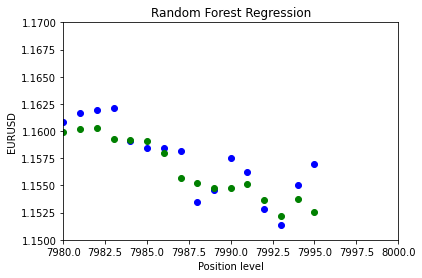

In [17]:
#for low prediction
# Visualising the Random Forest Regression results

# arange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01
# between two consecutive values
X_grid = np.arange(min(x), max(x), 1)

# reshape for reshaping the data into a len(X_grid)*1 array,
# i.e. to make a column out of the X_grid value				
X_grid = X_grid.reshape((len(X_grid), 1))

# Scatter plot for original data
plt.scatter(x, y, color = 'blue')

# plot predicted data
plt.scatter(X_grid, regressor.predict(X_grid),
		color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('EURUSD')
plt.xlim(7980,8000)
plt.ylim(1.15,1.17)
plt.show()

In [18]:
#for high prediction
#select rows to use for x,y
x = eu.iloc[:,[0]].values
print(x)
y = eu.iloc[:,[4]].values
print(y)

[[   0]
 [   1]
 [   2]
 ...
 [7996]
 [7997]
 [7998]]
[[1.2429 ]
 [1.2559 ]
 [1.2595 ]
 ...
 [1.15952]
 [1.14874]
 [1.1462 ]]


In [19]:
#for high prediction
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [20]:
#for high prediction and accuracy test
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
# create regressor object
regressor = RandomForestRegressor(n_estimators = 2000, n_jobs=-1, criterion='mae')
#regressor = RandomForestRegressor(n_jobs=-1)
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
#for high prediction
y_pred = regressor.predict(X_test)
mape = mean_absolute_percentage_error(y_test,y_pred)

In [22]:
#for high regression score
from sklearn import metrics 
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', mape)
print('MedAE', metrics.median_absolute_error(y_test,y_pred)) 
#print('MdAPE', metrics)

MAE: 0.004411888268750945
MSE: 3.692375703567101e-05
RMSE: 0.006076492165359141
MAPE: 13.995694237259604
MedAE 0.003345456249999379


In [23]:
#for high prediction
y_pred_h = regressor.predict(np.array([7999]).reshape(1, 1)) # test the output by changing values
y_pred_h

array([1.14875738])

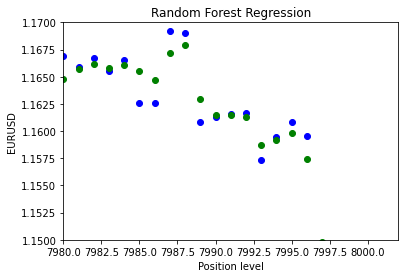

In [24]:
#for high prediction
# Visualising the Random Forest Regression results

# arange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01
# between two consecutive values
X_grid = np.arange(min(x), max(x), 1)

# reshape for reshaping the data into a len(X_grid)*1 array,
# i.e. to make a column out of the X_grid value				
X_grid = X_grid.reshape((len(X_grid), 1))

# Scatter plot for original data
plt.scatter(x, y, color = 'blue')

# plot predicted data
plt.scatter(X_grid, regressor.predict(X_grid),
		color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('EURUSD')
plt.xlim(7980,8002)
plt.ylim(1.15,1.17)
plt.show()

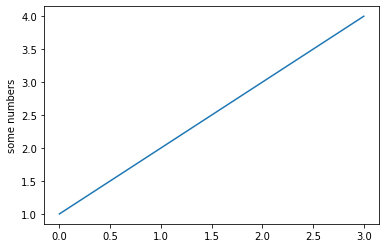

In [25]:
import matplotlib.pyplot as plt
plt.plot([y_pred_c, y_pred_l, y_pred_h])
plt.ylabel('some numbers')
plt.show()